In [2]:
%load_ext autoreload
%autoreload 2


import os
import sys
import time

import numpy as np
from tqdm import tqdm

import multiprocessing as mp

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from PIL import Image
from torchvision import transforms as tf

from torch.utils.data import Dataset

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

sys.path.append(os.path.join(os.getcwd(), '../src/'))

# print torch version
print(torch.__version__)

print('Number of available CPUs:', mp.cpu_count())
if torch.cuda.is_available():
    print('Number of available GPUs:', torch.cuda.device_count())


1.13.1
Number of available CPUs: 16
Number of available GPUs: 1


In [3]:
# ## Data

from data.CustomDataset import CustomDataset
from data.CustomDataloader import CustomDataLoader

DATA_DIR = '../data/raw/'

# define transforms
transform = tf.Compose([
    tf.Resize((224, 224)),
    tf.ToTensor() ])

dataset = CustomDataset(DATA_DIR, transform=transform)


In [4]:
dataloader = CustomDataLoader(dataset, batch_size=32, shuffle=True, num_workers=4)

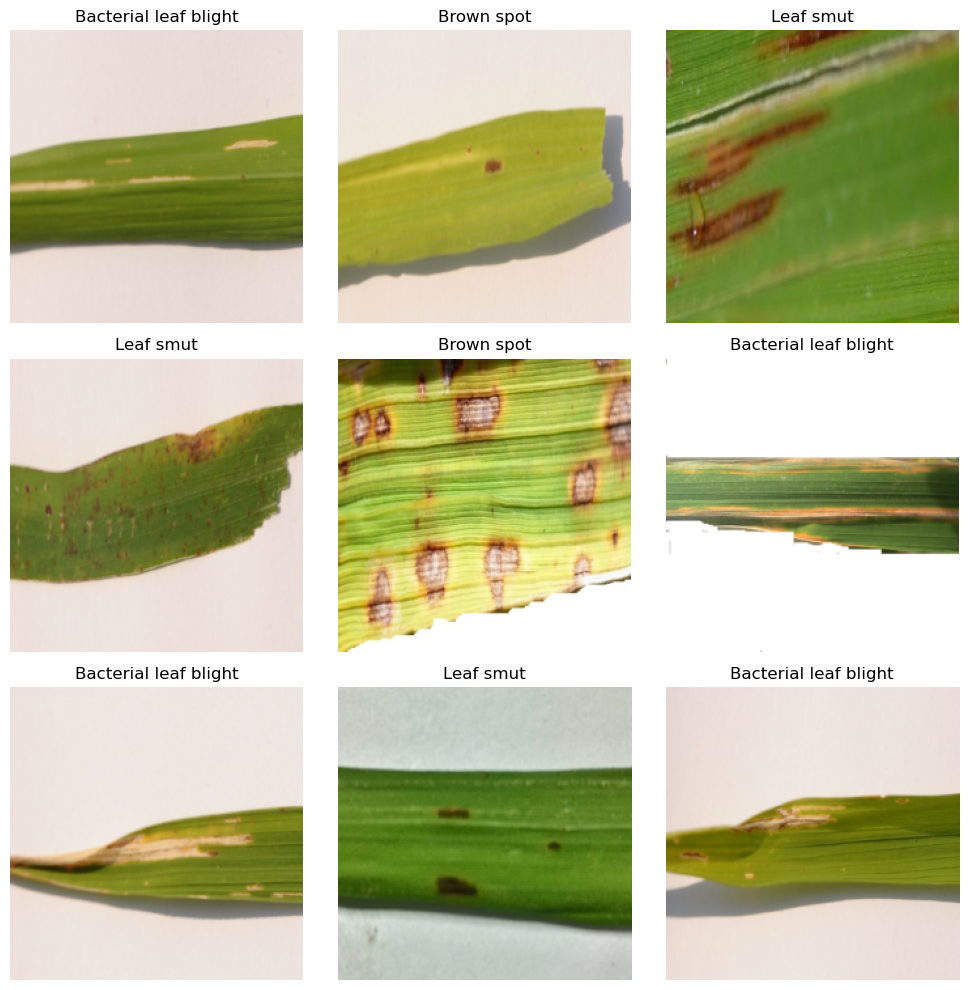

In [6]:
# show 9 random images in the 3 X 3 grid from the dataset with the labels

fig = plt.figure(figsize=(10, 10))
for i in range(9):
    img, label = dataset[np.random.randint(len(dataset))]
    ax = fig.add_subplot(3, 3, i + 1)
    ax.imshow(img.permute(1, 2, 0))
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
fig.savefig('../data/figures/sample_images.png')
plt.show()
